In [83]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from figures_load_data import load_data_function

# markers
marker_triple = 's'
marker_crit = 'o'
marker_exp_vle = '^'
marker_exp_sle = 'v'
marker_exp_sve = 'D'
markersize = 3.
linewidth_triple = 0.4
# Figure sizes
inTocm = 2.54
base_height = 5.  # cm
width_single_column = 8.  # cm
width_two_columns = 14.  # cm
width_three_columns = 17.  # cm
dpi = 400
format = 'pdf'
fontsize_annotation = 8

# figure style
plt.style.use('seaborn-v0_8-colorblind')
plt.style.use('./figures.mplstyle')

##############################
# folder to save the figures # 
##############################

folder_to_save = '../figures'
os.makedirs(folder_to_save, exist_ok=True)

In [84]:
from scipy.interpolate import interp1d

In [191]:
# Reading the data for the figure
root_folder_to_read = "../computed_files"

# To  get the limits and folders correctly

folder_to_read_names = dict()
folder_to_read_names['argon'] = "1_1_argon"
folder_to_read_names['xenon'] = "1_2_xenon"
folder_to_read_names['krypton'] = "1_3_krypton"
folder_to_read_names['methane'] = "1_4_methane"
folder_to_read_names['nitrogen'] = "1_6_nitrogen"
folder_to_read_names['carbon_monoxide'] = "1_7_co"
folder_to_read_names['cf4'] = "1_8_cf4"


expdata_filenames = dict()
expdata_filenames['argon'] = "argon.xlsx"
expdata_filenames['xenon'] = "xenon.xlsx"
expdata_filenames['krypton'] = "krypton.xlsx"
expdata_filenames['methane'] = "methane.xlsx"
expdata_filenames['nitrogen'] = "nitrogen.xlsx"
expdata_filenames['carbon_monoxide'] = "carbon_monoxide.xlsx"
expdata_filenames['cf4'] = "cf4.xlsx"

component_names = dict()
component_names['argon'] = r"Ar"
component_names['xenon'] = r"Xe"
component_names['krypton'] = r"Kr"
component_names['methane'] = r"CH$_{4}$"
component_names['nitrogen'] = r"N$_{2}$"
component_names['carbon_monoxide'] =  r"CO"
component_names['cf4'] = r"CF$_{4}$"

phase_equilibria_limits = dict()
phase_equilibria_limits['argon'] = {'rho_lower': -1, 'rho_upper': 45, 'T_lower': 73, 'T_upper': 200, 'P_lower': 5e-3, 'P_upper': 1e3, 'H_upper': 9, 'markerevery_sve': 3}
phase_equilibria_limits['xenon'] = {'rho_lower': -1, 'rho_upper': 30, 'T_lower': 110, 'T_upper': 340, 'P_lower': 1e-3, 'P_upper': 1e3, 'H_upper': 18, 'markerevery_sve': 1}
phase_equilibria_limits['krypton'] = {'rho_lower': -1, 'rho_upper': 40, 'T_lower': 100, 'T_upper': 260, 'P_lower': 5e-3, 'P_upper': 1e3, 'H_upper': 10, 'markerevery_sve': 3}
phase_equilibria_limits['methane'] = {'rho_lower': -1, 'rho_upper':35, 'T_lower': 80, 'T_upper': 240, 'P_lower': 1e-3, 'P_upper': 1e3, 'H_upper': 12, 'markerevery_sve': 2}
phase_equilibria_limits['nitrogen'] = {'rho_lower': -1, 'rho_upper': 40, 'T_lower': 55, 'T_upper': 205, 'P_lower': 1e-3, 'P_upper': 5e3, 'H_upper': 8, 'markerevery_sve': 2}
phase_equilibria_limits['carbon_monoxide'] = {'rho_lower': -1, 'rho_upper': 40, 'T_lower': 60, 'T_upper': 160, 'P_lower': 1e-3, 'P_upper': 1e3, 'H_upper': 9, 'markerevery_sve': 2}
phase_equilibria_limits['cf4'] = {'rho_lower': -1, 'rho_upper': 25, 'T_lower': 80, 'T_upper': 300, 'P_lower': 1e-5, 'P_upper': 1e3, 'H_upper': 18, 'markerevery_sve': 1}

other_properties_limits = dict()
other_properties_limits['argon'] = {'T_lower': 73, 'T_upper': 160, 'diff_lower': 8e-10, 'diff_upper': 1e-4}
other_properties_limits['xenon'] = {'T_lower': 150, 'T_upper': 320, 'diff_lower': 1e-9, 'diff_upper': 1e-4}
other_properties_limits['krypton'] = {'T_lower': 110, 'T_upper': 220, 'diff_lower': 8e-10, 'diff_upper': 5e-4}
other_properties_limits['methane'] = {'T_lower': 85, 'T_upper': 210, 'diff_lower': 1e-9, 'diff_upper': 1e-4}
other_properties_limits['nitrogen'] = {'T_lower': 60, 'T_upper': 135, 'diff_lower': 1e-7, 'diff_upper': 1e-4}
other_properties_limits['carbon_monoxide'] = {'T_lower': 65, 'T_upper': 145, 'diff_lower': 1e-9, 'diff_upper': 1e-4}
other_properties_limits['cf4'] = {'T_lower': 80, 'T_upper': 280, 'diff_lower': 1e-10, 'diff_upper': 1e-6}

# what models to include in the figures
fluid_types = ['vle', 'vle_visc']
solid_types = ['vle_sle_sve', 'vle', 'vle_visc']

component_list = ['argon', 'krypton', 'xenon', 'nitrogen', 'carbon_monoxide', 'methane', 'cf4']
# component_list = ['cf4']
main_chapter = ['argon', 'nitrogen', 'methane', 'cf4']

In [192]:
expdata_excel_dict = dict()
data_dict_models = dict()
for component_name in component_list:
    folder_to_read = folder_to_read_names[component_name]
    expdata_filename = expdata_filenames[component_name]

    out = load_data_function(root_folder_to_read, folder_to_read, expdata_filename)
    ExpDataFile, dict_models = out

    expdata_excel_dict[component_name] = ExpDataFile
    data_dict_models[component_name] = dict_models

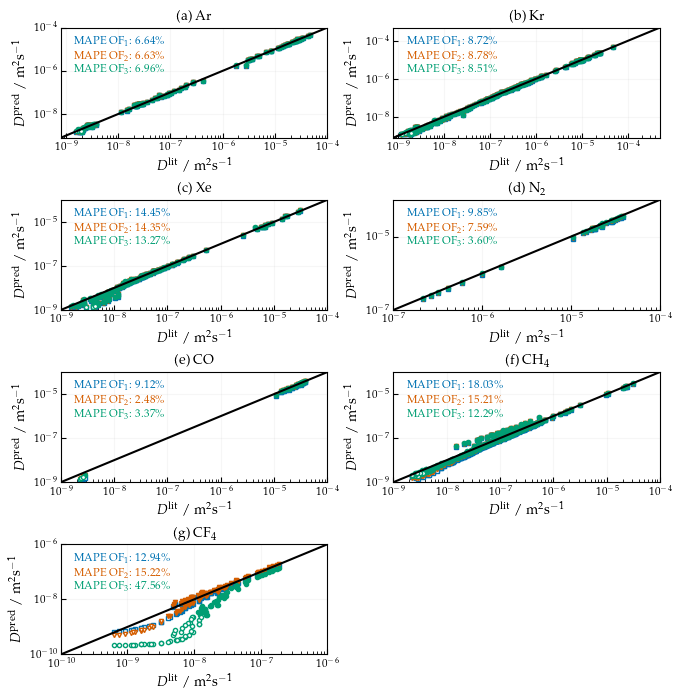

In [194]:
height = 3.5 * base_height / inTocm
width = width_three_columns / inTocm
markersize = 3.
fontsize_annotation = 8 

########

fig = plt.figure(figsize=(width, height), constrained_layout=True)
gs = fig.add_gridspec(4, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[3, 0])
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]
for ax in ax_list:
    ax.tick_params(direction='in', which='both')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(True)
    ax.set_xlabel(r'$D^{\rm lit}$ / $\mathrm{m^2s^{-1}}$')
    ax.set_ylabel(r'$D^{\rm pred}$ / $\mathrm{m^2s^{-1}}$')

model_types = ['vle', 'vle_visc', 'vle_sle_sve'] 
title_list = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)']

dict_kwargs = dict()
dict_kwargs['vle'] = dict(linestyle='', color='C0', marker='s', label=r'OF$_1$')
dict_kwargs['vle_visc'] = dict(linestyle='', color='C2', marker='v', label=r'OF$_2$')
dict_kwargs['vle_sle_sve'] = dict(linestyle='', color='C1', marker='o', label=r'OF$_3$')


for component_name, ax, title in zip(component_list, ax_list, title_list):
    # setting title
    ax.set_title(title + ' ' + component_names[component_name])

    dict_models = data_dict_models[component_name]   
    ylabels_pos = [0.85, 0.72, 0.60] 
    for model_type, ylabel_pos in zip(model_types, ylabels_pos):
        # Reading the self diffusivity data
        dict_values = dict_models['dict_values'][model_type]
        T_diff_lit = dict_values['T_diff_lit']
        rho_diff_lit = dict_values['rho_diff_lit'] 
        diff_lit = dict_values['diff_lit']
        diff_model = np.array(dict_values['diff_model'])
        diff_mape = dict_values['diff_mape']
        phase_diff = dict_values['phase_diff']

        # reading phase boundaries
        df_info = dict_models[f'{model_type}_solid_file'].parse('info')
        # df_vle = dict_models[f'{model_type}_solid_file'].parse('vle')
        df_sle = dict_models[f'{model_type}_solid_file'].parse('sle')

        # Checking if the model predicts a frozen point
        is_stable = np.ones_like(T_diff_lit, dtype=bool)
        # checking if temperature is above the triple point
        is_stable[T_diff_lit < df_info['T_triple_model'].values] = False

        # checking if the density is below the density of the liquid SLE
        rhol_sle_intp = interp1d(df_sle['T_sle_model'].to_numpy(), df_sle['rhol_sle_model'].to_numpy(), fill_value='extrapolate')
        is_stable[rho_diff_lit > rhol_sle_intp(T_diff_lit)] = False

        #####################
        # Plotting the data #
        #####################
        ax.plot(diff_lit[is_stable], diff_model[is_stable], **dict_kwargs[model_type], markersize=markersize)
        ax.plot(diff_lit[~is_stable], diff_model[~is_stable], **dict_kwargs[model_type], markersize=markersize, markerfacecolor='white')

        mape = 100. * np.nanmean(np.abs(diff_model[is_stable]/diff_lit[is_stable] - 1.))
        ax.text(0.05, ylabel_pos, 'MAPE ' + dict_kwargs[model_type]['label'] + f': {mape:.2f}\%', 
                transform=ax.transAxes, fontsize=fontsize_annotation, color=dict_kwargs[model_type]['color'])

    diff_lower = other_properties_limits[component_name]['diff_lower']
    diff_upper = other_properties_limits[component_name]['diff_upper']
    ax.set_xlim([diff_lower, diff_upper])
    ax.set_ylim([diff_lower, diff_upper])
    ax.plot([diff_lower, diff_upper], [diff_lower, diff_upper], color='k')